Load and Feature Engineering

In [2]:
import pandas as pd 

df=pd.read_csv('cleaned_network_data.csv')
df.columns

Index(['timestamp', 'tower_id', 'latency_sec', 'bandwidth', 'dropped_calls',
       'total_calls', 'uptime_percent', 'network_type', 'operator',
       'users_connected', 'download_speed_mbps', 'signal_strength_dbm',
       'tower_load_percent', 'average_call_duration_sec',
       'handover_success_rate', 'packet_loss_percent', 'jitter_ms',
       'tower_temperature_c', 'battery_backup_hours', 'tower_age_years',
       'maintenance_due', 'upload_speed_mbps', 'call_drop_reason',
       'weather_condition', 'technician_notes', 'last_maintenance',
       'tower_color', 'is_test_tower', 'tower_height_m', 'signal_icon',
       'internal_code', 'notes', 'extra_flag', 'location.latitude',
       'location.longitude', 'signal_strength.RSSI', 'signal_strength.RSRP',
       'signal_strength.SINR', 'voip_metrics.jitter_ms',
       'voip_metrics.packet_loss_percent', 'call_drop_rate', 'bandwidth_mbps'],
      dtype='object')

Drop unrequierd rows

In [3]:
irrelevant_cols = [
    "weather_condition",
    "technician_notes",
    "last_maintenance",
    "tower_color",
    "is_test_tower",
    "tower_height_m",
    "signal_icon",
    "internal_code",
    "notes",
    "extra_flag"
]

df = df.drop(columns=irrelevant_cols)

In [5]:
df.columns

Index(['timestamp', 'tower_id', 'latency_sec', 'bandwidth', 'dropped_calls',
       'total_calls', 'uptime_percent', 'network_type', 'operator',
       'users_connected', 'download_speed_mbps', 'signal_strength_dbm',
       'tower_load_percent', 'average_call_duration_sec',
       'handover_success_rate', 'packet_loss_percent', 'jitter_ms',
       'tower_temperature_c', 'battery_backup_hours', 'tower_age_years',
       'maintenance_due', 'upload_speed_mbps', 'call_drop_reason',
       'location.latitude', 'location.longitude', 'signal_strength.RSSI',
       'signal_strength.RSRP', 'signal_strength.SINR',
       'voip_metrics.jitter_ms', 'voip_metrics.packet_loss_percent',
       'call_drop_rate', 'bandwidth_mbps'],
      dtype='object')

In [19]:
def needs_optimization_relaxed(row):
    conditions = [
        row['uptime_percent'] < 95,
        row['dropped_calls'] / max(row['total_calls'], 1) > 0.1,
        row['download_speed_mbps'] < 5 or row['upload_speed_mbps'] < 2,
        row['packet_loss_percent'] > 3 or row['jitter_ms'] > 18,
        row['signal_strength.RSSI'] < -105 or row['signal_strength.RSRP'] < -125 or row['signal_strength.SINR'] < -5
    ]
    # Only require 2 or more violations to flag
    return sum(conditions) >= 2

df['needs_optimization'] = df.apply(needs_optimization_relaxed, axis=1)

In [20]:
df.head()

,timestamp,tower_id,latency_sec,bandwidth,dropped_calls,total_calls,uptime_percent,network_type,operator,users_connected,...,location.latitude,location.longitude,signal_strength.RSSI,signal_strength.RSRP,signal_strength.SINR,voip_metrics.jitter_ms,voip_metrics.packet_loss_percent,call_drop_rate,bandwidth_mbps,needs_optimization
0,2025-08-22 00:00:00,TWR1062,0.363,64.56 Gbps,3,129,97.15,5G,Three,478,...,57.144657,-2.092696,-110.41,-135.70,29.61,19.47,0.76,2.325581,64560.00,False
1,2025-08-22 00:05:00,TWR1077,0.110,81.71 Mbps,9,118,97.70,4G,O2,308,...,52.493125,-1.897314,-73.55,-93.07,12.72,46.30,3.71,7.627119,81.71,False
2,2025-08-22 00:10:00,TWR1056,0.965,98.17 Mbps,0,69,96.56,4G,EE,272,...,53.408641,-2.987669,-91.22,-82.46,21.31,38.92,1.36,0.000000,98.17,False
3,2025-08-22 00:15:00,TWR1043,0.364,12.41 Gbps,8,191,99.28,4G,Vodafone UK,88,...,51.744629,-1.264011,-99.08,-90.35,-9.89,12.17,0.89,4.188482,12410.00,True
4,2025-08-22 00:20:00,TWR1062,0.211,98.31 Gbps,3,69,97.56,5G,O2,15,...,53.408299,-2.983090,-73.74,-115.27,24.99,11.50,2.02,4.347826,98310.00,False


In [33]:
df.isna().sum()

timestamp                             0
tower_id                              0
latency_sec                           0
bandwidth                             0
dropped_calls                         0
total_calls                           0
uptime_percent                        0
network_type                          0
operator                              0
users_connected                       0
download_speed_mbps                   0
signal_strength_dbm                   0
tower_load_percent                    0
average_call_duration_sec             0
handover_success_rate                 0
packet_loss_percent                   0
jitter_ms                             0
tower_temperature_c                   0
battery_backup_hours                  0
tower_age_years                       0
maintenance_due                       0
upload_speed_mbps                     0
call_drop_reason                    501
location.latitude                     0
location.longitude                    0


In [35]:
df = df.dropna(subset=['call_drop_reason'])

In [36]:
df.isna().sum()

timestamp                           0
tower_id                            0
latency_sec                         0
bandwidth                           0
dropped_calls                       0
total_calls                         0
uptime_percent                      0
network_type                        0
operator                            0
users_connected                     0
download_speed_mbps                 0
signal_strength_dbm                 0
tower_load_percent                  0
average_call_duration_sec           0
handover_success_rate               0
packet_loss_percent                 0
jitter_ms                           0
tower_temperature_c                 0
battery_backup_hours                0
tower_age_years                     0
maintenance_due                     0
upload_speed_mbps                   0
call_drop_reason                    0
location.latitude                   0
location.longitude                  0
signal_strength.RSSI                0
signal_stren

Now we'll Train the model with RandomForest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
feature_cols = [
    'latency_sec', 'bandwidth_mbps', 'dropped_calls', 'total_calls', 
    'uptime_percent', 'users_connected', 'download_speed_mbps', 'upload_speed_mbps',
    'signal_strength.RSSI', 'signal_strength.RSRP', 'signal_strength.SINR',
    'tower_load_percent', 'average_call_duration_sec', 'handover_success_rate',
    'packet_loss_percent', 'jitter_ms', 'tower_temperature_c', 'battery_backup_hours',
    'tower_age_years'
]

# Keep only rows with no missing values in features or target
df_model = df.dropna(subset=feature_cols + ['needs_optimization'])

# Extract X and y from the same DataFrame
X = df_model[feature_cols]
y = df_model['needs_optimization']

print(X.shape, y.shape)  # Should now match

(8499, 19) (8499,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
y_pred = model.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1229
        True       1.00      0.95      0.98       471

    accuracy                           0.99      1700
   macro avg       0.99      0.98      0.98      1700
weighted avg       0.99      0.99      0.99      1700

[[1229    0]
 [  22  449]]


Feature Importance:
 packet_loss_percent          0.307590
signal_strength.RSSI         0.158767
signal_strength.RSRP         0.143623
jitter_ms                    0.078954
signal_strength.SINR         0.077410
total_calls                  0.058345
dropped_calls                0.036083
tower_load_percent           0.013744
latency_sec                  0.013338
bandwidth_mbps               0.013233
handover_success_rate        0.012737
tower_temperature_c          0.012466
uptime_percent               0.011997
average_call_duration_sec    0.011773
battery_backup_hours         0.011279
upload_speed_mbps            0.010272
users_connected              0.010141
download_speed_mbps          0.009901
tower_age_years              0.008347
dtype: float64


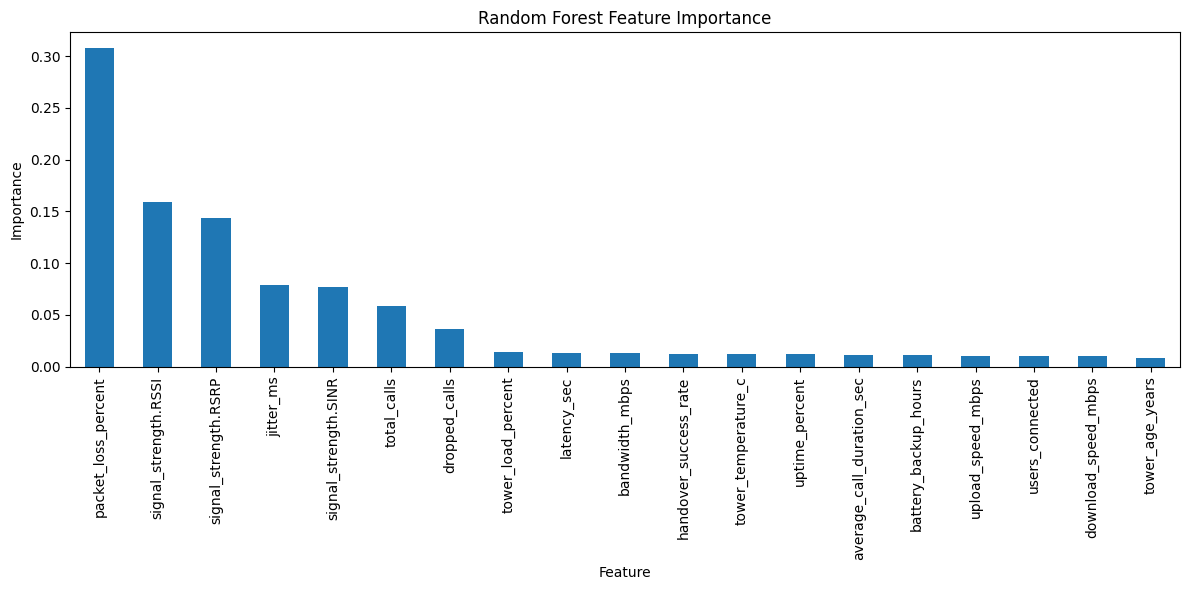

In [57]:
import matplotlib.pyplot as plt

importance = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("Feature Importance:\n", importance)

# Optional: Plot feature importance
plt.figure(figsize=(12,6))
importance.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()